# **Lab 5**

### Question:
#### Write a python program to build a Convolution Layer of 5 different kernel and test using different images. Kernels are the following:

1. $\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1\\
\end{bmatrix}$

2. $\begin{bmatrix}
-1 & -1 & -1\\
-1 & 5 & -1\\
-1 & -1 & -1\\
\end{bmatrix}$

3. $\begin{bmatrix}
1 & 1 & 1\\
1 & 8 & 1\\
1 & 1 & 1\\
\end{bmatrix}$

4. $\begin{bmatrix}
1 & 0 & -1\\
2 & 0 & -2\\
1 & 0 & -1\\
\end{bmatrix}$

5. Transpose the matrix 4.

### Solution

In [1]:
# Import Libraries
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#### Convolution and pooling layers

In [21]:
class convolution:

    def __init__(self, padding: int, stride: int) -> None:
        # Getting input
        self.padding = padding
        self.stride = stride


    # Convolution Layer
    def conv(self,input_data, kernel: np.matrix):
        # Dimention of Output feature map
        output_feature_map_row = int(np.floor((len(input_data) - len(kernel) + 2*self.padding) / self.stride + 1))
        output_feature_map_col = int(np.floor((len(input_data[0]) - len(kernel[0]) + 2*self.padding) / self.stride + 1))
        # Output dimention without stride
        out_row = len(input_data) - len(kernel) + 2*self.padding + 1
        out_col = len(input_data[0]) - len(kernel[0]) + 2*self.padding + 1
        input_data = np.pad(input_data,(self.padding,self.padding),'constant', constant_values=(0))
        conv_layer = []
        # Multiplication of kernel and input image
        for i  in range(0,out_row,self.stride):
            for j in range(0,out_col,self.stride):
                val = np.sum(np.dot(input_data[i:i+len(kernel),j:j+len(kernel[0])],kernel))
                conv_layer.append(val)
        conv_layer = np.array(conv_layer).reshape(output_feature_map_row,output_feature_map_col)
        return conv_layer
    
    # Pooling Layers
    def max_pool(self,input_data,kernel: tuple):
        pooling_layer = []
        for i in range(len(input_data) - kernel[0] + 1):
            for j in range(len(input_data[0]) - kernel[1] + 1):
                # Getting the elements from matrix of the kernel size and max among them
                pool_var = np.max(input_data[i:i+kernel[0],j:j+kernel[1]].flatten())
                pooling_layer.append(pool_var)
        pooling_layer = np.array(pooling_layer).reshape(len(input_data) - kernel[0] + 1,len(input_data[0]) - kernel[1] + 1)
        return pooling_layer                
    
    def min_pool(self,input_data,kernel: tuple):
        pooling_layer = []
        for i in range(len(input_data) - kernel[0] + 1):
            for j in range(len(input_data[0]) - kernel[1] + 1):
                # Getting the elements from matrix of the kernel size and min among them
                pool_var = np.min(input_data[i:i+kernel[0],j:j+kernel[1]].flatten())
                pooling_layer.append(pool_var)
        pooling_layer = np.array(pooling_layer).reshape(len(input_data) - kernel[0] + 1,len(input_data[0]) - kernel[1] + 1)
        return pooling_layer   

    def avg_pool(self,input_data,kernel: tuple):
        pooling_layer = []
        for i in range(len(input_data) - kernel[0] + 1):
            for j in range(len(input_data[0]) - kernel[1] + 1):
                # Getting the elements from matrix of the kernel size and avg them
                pool_var = np.mean(input_data[i:i+kernel[0],j:j+kernel[1]].flatten())
                pooling_layer.append(pool_var)
        pooling_layer = np.array(pooling_layer).reshape(len(input_data) - kernel[0] + 1,len(input_data[0]) - kernel[1] + 1)
        return pooling_layer   


#### Kernels

In [37]:
# Kernel 1
ker1 = [[1,1,1],
        [1,1,1],
        [1,1,1]]
ker1 = np.array(ker1)

# Kernel 2
ker2 = [[-1,-1,-1],
        [-1,5,-1],
        [-1,-1,-1]]
ker2 = np.array(ker2)

# Kernel 3
ker3 = [[1,1,1],
        [1,8,1],
        [1,1,1]]
ker3 = np.array(ker3)

# Kernel 4
ker4 = [[1,0,-1],
        [2,0,-2],
        [1,0,-1]]
ker4 = np.array(ker4)

# Kernel 5
ker5 = ker4.T

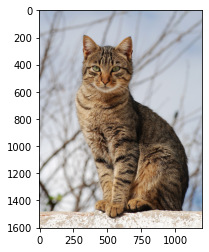

In [12]:
# Importing Image
cat = Image.open('Images/cat.jpg')
_ = plt.imshow(cat)

#### Image formating:

1. Black and white converting (Grayscaling)
2. Resizing
3. Generating Image Matrix

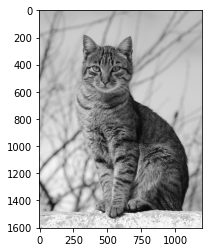

In [13]:
# Grayscaling
cat_gray = cat.convert('LA')
_ = plt.imshow(cat_gray)

In [19]:
# Resizing Image
cat = cat.resize((300,400))

In [20]:
# Image matrix construction
cat_mat = np.array(list(cat.getdata(band=0)), np.uint8)
cat_mat.shape = (cat.size[1], cat.size[0])
cat_mat.shape

(400, 300)

#### Convolution Operation

In [26]:
con = convolution(3,2)
conv1 = con.conv(cat_mat,ker1)
conv2 = con.conv(cat_mat,ker2)
conv3 = con.conv(cat_mat,ker3)
conv4 = con.conv(cat_mat,ker4)
conv5 = con.conv(cat_mat,ker5)

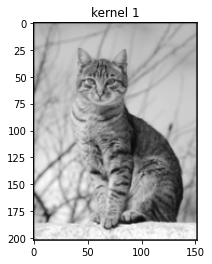

In [39]:
plt.imshow(conv1,cmap='gray')
_ = plt.title('kernel 1')

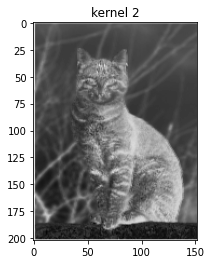

In [38]:
plt.imshow(conv2,cmap='gray')
_ = plt.title('kernel 2')

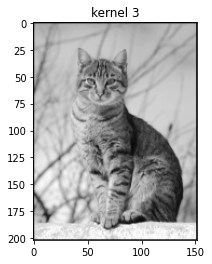

In [40]:
plt.imshow(conv3,cmap='gray')
_ = plt.title('kernel 3')

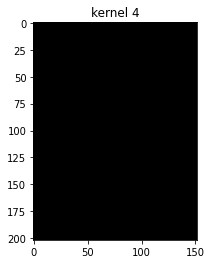

In [41]:
plt.imshow(conv4,cmap='gray')
_ = plt.title('kernel 4')

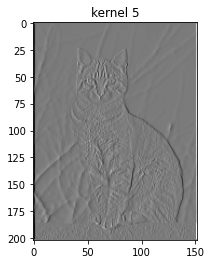

In [42]:
plt.imshow(conv5,cmap='gray')
_ = plt.title('kernel 5')